In [9]:
import pandas as pd
df = pd.read_csv('/home/silver/Desktop/jupyter/boston-housing-dataset.csv')

print(df.head(20))


    Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  \
0            0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1   
1            1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2   
2            2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2   
3            3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3   
4            4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3   
5            5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3   
6            6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5   
7            7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5   
8            8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5   
9            9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5   
10          10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5   
11          11  0.11747  12.5   7.87    

In [10]:
data = df.loc[:, ['LSTAT', 'MEDV']]
data.head(20)

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
5,5.21,28.7
6,12.43,22.9
7,19.15,27.1
8,29.93,16.5
9,17.10,18.9


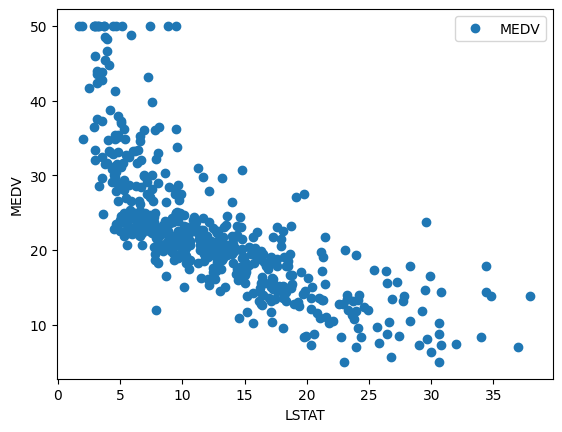

In [11]:
import matplotlib.pyplot as plt
df.plot(x='LSTAT', y='MEDV', style='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

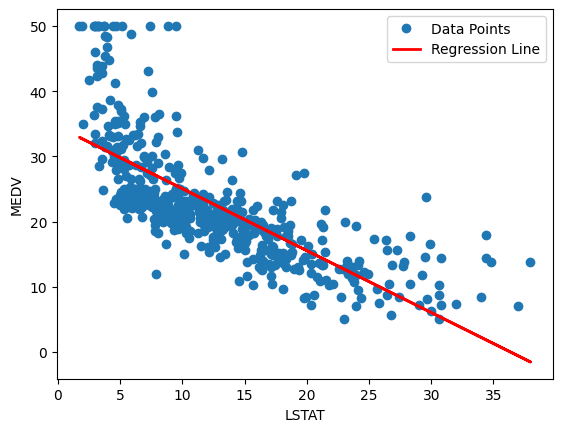

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

X = df[['LSTAT']]
y = df[['MEDV']]
regressor.fit(X, y)
df.plot(x='LSTAT', y='MEDV', style='o', label='Data Points')
plt.plot(X, regressor.predict(X), color='red', linewidth=2, label='Regression Line')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend()
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
x=pd.DataFrame(data['LSTAT'])
y=pd.DataFrame(data['MEDV'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)                                             

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [20]:
regressor.fit(X_train,y_train)
print(regressor.intercept_)

print(regressor.coef_)



[34.33497839]
[[-0.92441715]]


In [21]:
y_pred = regressor.predict(X_test)
y_pred
y_test.head(20)



,MEDV
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8
132,23.0
292,27.9
31,14.5
218,21.5
90,22.6


In [22]:
from sklearn import metrics
import numpy as np

#Assuming y_test and y_pred are NumPy arrays or Pandas Series
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 5.078127727696937
Mean Squared Error (MSE): 46.994820919547124
Root Mean Squared Error (RMSE): 6.855276866731724


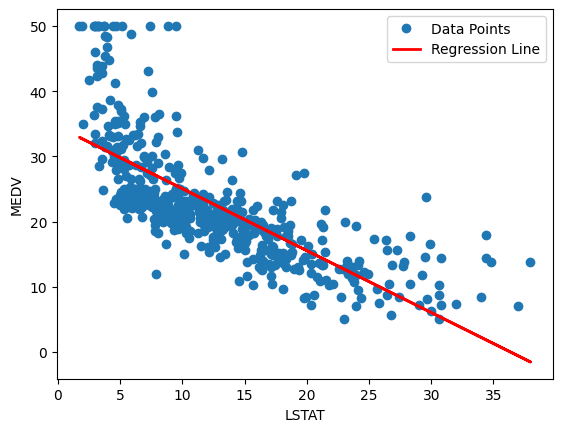

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


#Extract the independent variable (X) and dependent variable (y)
X = df[['LSTAT']]
y = df['MEDV']

#Create and fit a linear regression model
regressor = LinearRegression()
regressor.fit(X, y)

#Plot the data points
df.plot(x='LSTAT', y='MEDV', style='o', label='Data Points')

#Overlay the regression line
plt.plot(X, regressor.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend()
plt.show()

In [26]:
import joblib
import pickle  # Import the pickle module
from sklearn.linear_model import LinearRegression

#Train your linear regression model
model = LinearRegression()
model.fit(x, y)  # Replace X and y with your training data

#Save the trained model to a file using joblib
joblib.dump(model, 'linear_regression_model.pkl')

#Alternatively, you can save the model using pickle
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [27]:
import joblib
import numpy as np
import pandas as pd

#Sample X values for prediction
new_X = np.array([9.8, 7, 8, 9, 10]).reshape(-1, 1)  # Reshape to a 2D array

#Load the trained model
model = joblib.load('linear_regression_model.pkl')  # Load your trained model here

#Make predictions on the new X values
predictions = model.predict(new_X)

#Create a DataFrame with one-dimensional arrays
new_data = pd.DataFrame({'X': new_X.flatten(), 'Predicted_Y': predictions.flatten()})

#Display the new_data DataFrame with the X values and the predicted Y values
print(new_data)

      X  Predicted_Y
0   9.8    25.243357
1   7.0    27.903495
2   8.0    26.953446
3   9.0    26.003397
4  10.0    25.053347


/home/silver/Desktop/jupyter/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
